In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as simplefilter
from sklearn.metrics import confusion_matrix, classification_report

## Load Data

In [17]:
df_baskets = pd.read_csv('./retail_baskets.csv')
df_customers = pd.read_csv('./retail_customers.csv')
df_transactions = pd.read_csv('./retail_transactions.csv',encoding='latin-1')


# Set target and features
y = df_transactions['CustomerID']
x = df_transactions.drop(['InvoiceNo','CustomerID','InvoiceDate'], axis=1)




In [25]:
col_obj = x.select_dtypes(include='object')
col_obj = col_obj.loc[:, col_obj.nunique() < 5000]

x.dtypes
col_obj.nunique()
col_cat = list(col_obj.columns)
col_cat

StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
Country         object
dtype: object

StockCode      4070
Description    4223
Country          38
dtype: int64

['StockCode', 'Description', 'Country']

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
xle = x.copy()

for col in col_cat:
    xle[col] = le.fit_transform(x[col].astype(str))

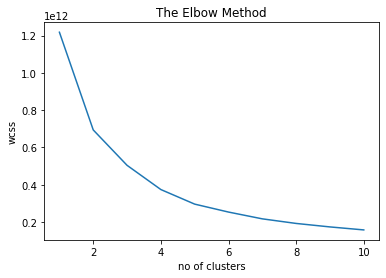

In [33]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0).fit(xle)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), array)
_ = plt.title('The Elbow Method')
_ = plt.xlabel('no of clusters')
_ = plt.ylabel('wcss')
plt.show()

In [35]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(xle)

In [37]:
plt.scatter(xle[y_kmeans == 0, 0], xle[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(xle[y_kmeans == 1, 0], xle[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(xle[y_kmeans == 2, 0], xle[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(xle[y_kmeans == 3, 0], xle[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(xle[y_kmeans == 4, 0], xle[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

TypeError: '(array([ True,  True, False, ..., False, False, False]), 0)' is an invalid key